In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def preprocess_data(file_path):
    data = pd.read_csv(file_path)
    
    # Separate features and response variables
    features  = data.iloc[:, :11]
    features = features.drop('npz', axis=1)
    keff = data.iloc[:, -1]

    # Standarize features
    scaler = StandardScaler()
    data_std = scaler.fit_transform(features)

    return data_std, keff

def perform_pca(data_std, n_components=10):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data_std)

    # Explained variance ratio and cumulative variance
    evr = pca.explained_variance_ratio_
    cev = evr.cumsum()

    return principal_components, evr, cev

def optimal_components(cev, var_to_keep):
    return np.argmax(cev >= var_to_keep) + 1

def main():
    data_std, keff = preprocess_data('csv back/ind_output_3D_v3.csv')
    principal_components, evr, cev = perform_pca(data_std)

    # Determine optimal number of components
    var_to_keep = 0.99
    num_components = optimal_components(cev, var_to_keep)

    # Print results
    print(f'Explained variance ratio: {evr}')
    print(f'Cumulative explained variance: {cev}')
    print(f'Number of components to keep to explain {var_to_keep*100}% of variance: {num_components}')

    # Create a DF for principal components
    pca_df = pd.DataFrame(data=principal_components[:, :num_components], columns=[f'PC{i+1}' for i in range(num_components)])
    print(pca_df.head())
    print(pca_df)
    return var_to_keep, pca_df
if __name__=='__main__':
    main()

Explained variance ratio: [5.12404503e-01 2.61286320e-01 9.20285830e-02 5.05627400e-02
 3.33584094e-02 3.02456430e-02 1.21135977e-02 7.16513689e-03
 6.25676676e-04 2.09390238e-04]
Cumulative explained variance: [0.5124045  0.77369082 0.86571941 0.91628215 0.94964056 0.9798862
 0.9919998  0.99916493 0.99979061 1.        ]
Number of components to keep to explain 99.0% of variance: 7
        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -2.923072 -2.981545 -0.602285  0.125669 -0.013159 -0.215180 -0.410871
1 -3.025278 -2.874868 -0.623305  0.037287 -0.015570 -0.193152 -0.135964
2 -2.925459 -1.684346 -0.363328 -0.762620  1.282207 -0.302522  0.320476
3 -2.183991 -1.554478 -0.333665 -0.877589 -1.296689 -0.067837  1.061856
4 -2.345116 -1.507207 -0.377612 -0.882048  1.258772  0.060292  1.094534
             PC1       PC2       PC3       PC4       PC5       PC6       PC7
0      -2.923072 -2.981545 -0.602285  0.125669 -0.013159 -0.215180 -0.410871
1      -3.025278 -2.874868 -0.

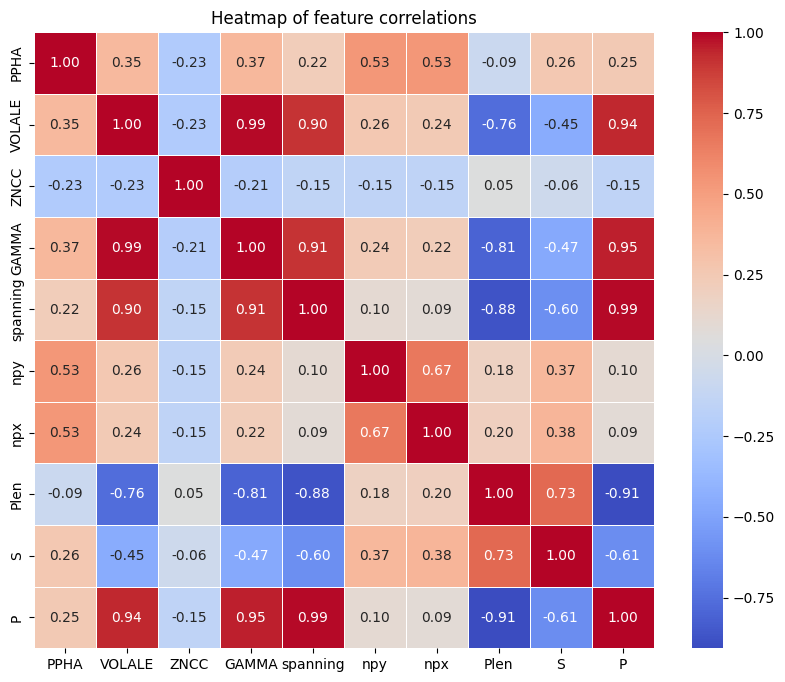

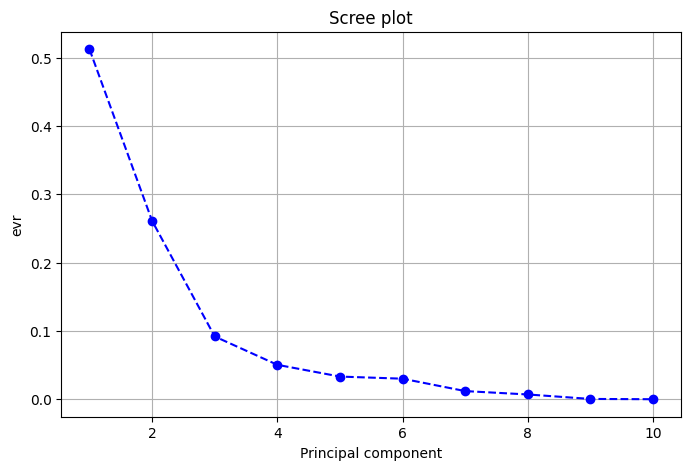

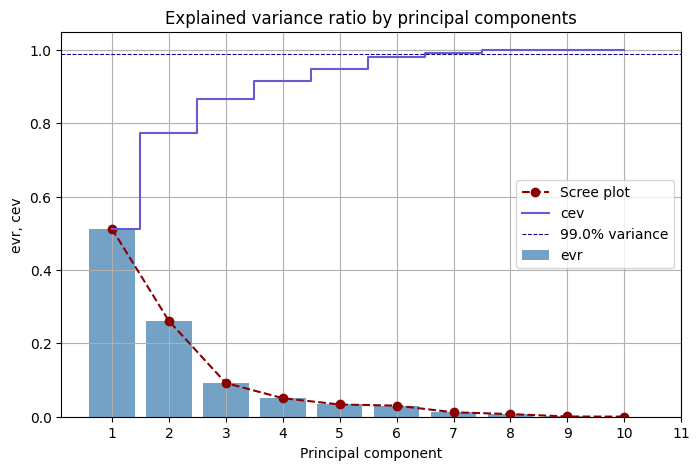

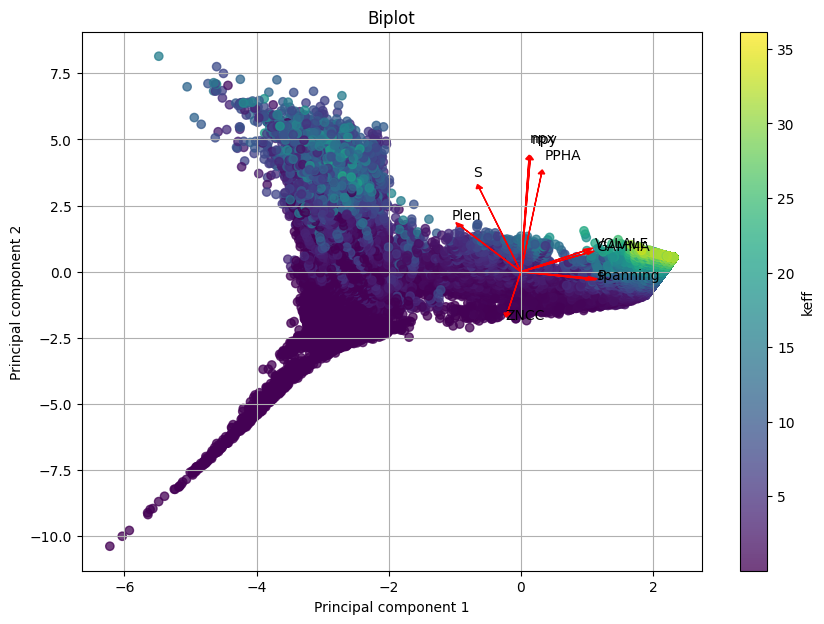

In [2]:
### PCA results visualization
import matplotlib.pyplot as plt
import seaborn as sns

def heatmap(features):
    correlation_matrix = features.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Heatmap of feature correlations')
    plt.show()
    plt.close()

def scree(evr):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(evr)+1), evr, marker= 'o', linestyle='--', color='b')
    plt.title('Scree plot')
    plt.xlabel('Principal component')
    plt.ylabel('evr')
    plt.grid(True)
    plt.show()
    plt.close()

def evr_cev(evr, cev, var_to_keep):
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(evr)+1), evr, alpha=.75, align='center', label='evr', color='steelblue')
    plt.plot(range(1, len(evr)+1), evr, marker= 'o', linestyle='--', label= 'Scree plot', color='darkred')
    plt.step(range(1, len(evr)+1), cev, where='mid', label='cev', color='slateblue')
    plt.axhline(y=var_to_keep, color='navy', lw = .75, linestyle='dashed', label=f'{var_to_keep*100}% variance')
    plt.xlabel('Principal component')
    plt.xticks(range(1,12))
    plt.ylabel('evr, cev')
    plt.legend(loc='center right')
    plt.title('Explained variance ratio by principal components')
    plt.grid(True)
    plt.show()

def biplot(principal_components, pca, features, feature_names, keff):
    plt.figure(figsize=(10, 7))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=keff, cmap= 'viridis', alpha=0.75)
    plt.colorbar(label='keff')
    
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, pca.components_[0, i]*max(principal_components[:, 0]), 
                  pca.components_[1, i]*max(principal_components[:, 1]),
                  color='r', head_width=0.1)
        plt.text(pca.components_[0, i]*max(principal_components[:, 0]) * 1.15, 
                 pca.components_[1, i]*max(principal_components[:, 1]) * 1.15, 
                 feature, color='k', fontsize=10, ha='left')
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    plt.title('Biplot')
    plt.grid(True)
    plt.show()

def pairplot(pca_df, keff):
    pca_df['keff'] = keff
    sns.pairplot(pca_df, diag_kind='kde', hue='keff', palette='viridis')
    plt.suptitle('Pairplot of proincipal component and keff', y = 1.02)
    plt.show()

def main():
    data_std, keff = preprocess_data('csv back/ind_output_3D_v3.csv')
    principal_components, evr, cev = perform_pca(data_std)
    var_to_keep = 0.99
    
    data = pd.read_csv('csv back/ind_output_3D_v3.csv')
    features = data.iloc[:, :11]
    features = features.drop('npz', axis=1)
    keff = data.iloc[:, -1]
    feature_names = features.columns[:10]
    pca = PCA(n_components=10)
    pca.fit(data_std)

    pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(10)])

    heatmap(features)

    scree(evr)
    
    evr_cev(evr, cev, var_to_keep)

    biplot(principal_components, pca, pd.DataFrame(data_std, columns=feature_names), feature_names, keff)

    #pairplot(pca_df, keff) # tarda mucho, mas de 25 min y el grafico no salio

if __name__ == "__main__":
    main()